In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df1 = df.loc[:,['PassengerId', 'Fare', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
df1.head()

,PassengerId,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,0,3,male,22.0,1,0,S
1,2,71.2833,1,1,female,38.0,1,0,C
2,3,7.9250,1,3,female,26.0,0,0,S
3,4,53.1000,1,1,female,35.0,1,0,S
4,5,8.0500,0,3,male,35.0,0,0,S


In [8]:
df.shape

(891, 12)

In [9]:
df1.head()

,PassengerId,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,0,3,male,22.0,1,0,S
1,2,71.2833,1,1,female,38.0,1,0,C
2,3,7.9250,1,3,female,26.0,0,0,S
3,4,53.1000,1,1,female,35.0,1,0,S
4,5,8.0500,0,3,male,35.0,0,0,S


In [10]:
df1.isnull().sum()

PassengerId      0
Fare             0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [11]:
a = df1["Age"].mean()
df1["Age"] = df1["Age"].fillna(a)
df1.head()

,PassengerId,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,0,3,male,22.0,1,0,S
1,2,71.2833,1,1,female,38.0,1,0,C
2,3,7.9250,1,3,female,26.0,0,0,S
3,4,53.1000,1,1,female,35.0,1,0,S
4,5,8.0500,0,3,male,35.0,0,0,S


In [12]:
df1.isnull().sum()

PassengerId    0
Fare           0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [13]:
df1["Embarked"].mode()

0    S
dtype: object

In [14]:
df1["Embarked"] = df1["Embarked"].fillna("S")
df1.head()

,PassengerId,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,0,3,male,22.0,1,0,S
1,2,71.2833,1,1,female,38.0,1,0,C
2,3,7.9250,1,3,female,26.0,0,0,S
3,4,53.1000,1,1,female,35.0,1,0,S
4,5,8.0500,0,3,male,35.0,0,0,S


In [15]:
df1.isnull().sum()

PassengerId    0
Fare           0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1["Sex"] = le.fit(df1["Sex"]).transform(df1["Sex"])
df1["Embarked"] = le.fit(df1["Embarked"]).transform(df1["Embarked"])

In [17]:
df1.head()

,PassengerId,Fare,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,0,3,1,22.0,1,0,2
1,2,71.2833,1,1,0,38.0,1,0,0
2,3,7.9250,1,3,0,26.0,0,0,2
3,4,53.1000,1,1,0,35.0,1,0,2
4,5,8.0500,0,3,1,35.0,0,0,2


In [18]:
x = df1.drop("Survived", axis=1)
#x = df.loc[:,['PassengerId', 'Fare', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
x.head()

,PassengerId,Fare,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,7.2500,3,1,22.0,1,0,2
1,2,71.2833,1,0,38.0,1,0,0
2,3,7.9250,3,0,26.0,0,0,2
3,4,53.1000,1,0,35.0,1,0,2
4,5,8.0500,3,1,35.0,0,0,2


In [19]:
y = df1.loc[:, ["Survived"]]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [22]:
clf.fit(x_train, y_train)

C:\Users\Prabodh\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.support_vectors_.shape

(273, 8)

In [24]:
y_pred = clf.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7910447761194029

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[141,  27],
       [ 29,  71]], dtype=int64)

In [29]:
df_cm = pd.DataFrame(cm, index = ["Survived", "Unsurvived"], columns=["Survived", "Unsurvived"])
df_cm.head()

,Survived,Unsurvived
Survived,141,27
Unsurvived,29,71


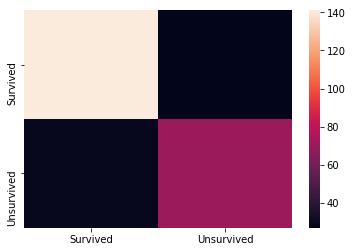

In [32]:
sns.heatmap(df_cm)